In [74]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/twitter-sentiment/twitter_training.csv')

In [5]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.drop(columns=['2401'], inplace = True)

In [7]:
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
df.columns

Index(['Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [9]:
df.rename(columns = {'Borderlands' : 'Game_Name',
                    'Positive' : 'Sentiment',
                    'im getting on borderlands and i will murder you all ,': 'tweet'}, inplace = True)

In [10]:
df.head()

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
df.isnull().sum()

Game_Name      0
Sentiment      0
tweet        686
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

Game_Name    0
Sentiment    0
tweet        0
dtype: int64

In [14]:
df.Sentiment.value_counts()

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [15]:
df_positive = df[df.Sentiment == 'Positive'].iloc[:2000]
df_negative = df[df.Sentiment == 'Negative'].iloc[:2000]
df_neutral = df[df.Sentiment == 'Neutral'].iloc[:2000]
df_Irrelevant = df[df.Sentiment == 'Irrelevant'].iloc[:2000]

In [16]:
df2 = pd.concat([df_positive,df_negative, df_neutral, df_Irrelevant], axis = 0)

In [17]:
df2.head()

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [18]:
df2.shape

(8000, 3)

In [19]:
df2.Sentiment.value_counts()

Sentiment
Positive      2000
Negative      2000
Neutral       2000
Irrelevant    2000
Name: count, dtype: int64

In [20]:
df2.Game_Name.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)'], dtype=object)

In [21]:
game_df = pd.get_dummies(df2['Game_Name']).astype('int')

In [22]:
game_df

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
10628,0,0,0,0,1
10629,0,0,0,0,1
10630,0,0,0,0,1
10631,0,0,0,0,1


In [23]:
df2.drop(columns = ['Game_Name'], inplace = True)

In [24]:
df2.head()

,Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [25]:
df2.shape, game_df.shape

((8000, 2), (8000, 5))

In [26]:
nlp = spacy.load('en_core_web_sm')

In [27]:
def lemmatisation(text):
    doc = nlp(text)
    lemmalist = [word.lemma_ for word in doc]
    return ' '.join(lemmalist)

In [28]:
df2['lemma'] = df2['tweet'].apply(lemmatisation)

In [29]:
df2.head()

,Sentiment,tweet,lemma
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,"
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,"
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...


In [30]:
def remove_stopwords(text):
    doc = nlp(text)
    no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
    return ' '.join(no_stopwords)

In [31]:
df2['final'] = df2['lemma'].apply(remove_stopwords)

In [32]:
df2.head()

,Sentiment,tweet,lemma,final
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,",come border kill
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,",m borderland kill
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...,m come borderland murder
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...,m borderland 2 murder
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...,m borderland murder


In [33]:
df2.drop(columns = ['tweet','lemma'], inplace = True)

In [34]:
df2.head()

,Sentiment,final
0,Positive,come border kill
1,Positive,m borderland kill
2,Positive,m come borderland murder
3,Positive,m borderland 2 murder
4,Positive,m borderland murder


In [35]:
sentiment_df = pd.concat([df2,game_df], axis = 1)

In [36]:
sentiment_df.head()

,Sentiment,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,Positive,come border kill,0,1,0,0,0
1,Positive,m borderland kill,0,1,0,0,0
2,Positive,m come borderland murder,0,1,0,0,0
3,Positive,m borderland 2 murder,0,1,0,0,0
4,Positive,m borderland murder,0,1,0,0,0


In [37]:
df2.shape

(8000, 2)

In [38]:
df2.isnull().sum()

Sentiment    0
final        0
dtype: int64

In [39]:
x= sentiment_df.drop(columns = 'Sentiment')
y = sentiment_df['Sentiment']

In [40]:
x.head()

,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,come border kill,0,1,0,0,0
1,m borderland kill,0,1,0,0,0
2,m come borderland murder,0,1,0,0,0
3,m borderland 2 murder,0,1,0,0,0
4,m borderland murder,0,1,0,0,0


In [42]:
tfidf = TfidfVectorizer()

In [43]:
tfidf.fit(x['final'])

TfidfVectorizer()

In [45]:
tfidf_matrix = tfidf.transform(x['final']).toarray()

In [46]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
vectorizer_df = pd.DataFrame(tfidf_matrix, columns = tfidf.get_feature_names_out())

In [49]:
vectorizer_df.head()

,00,000,01,02,03,03573057,0359873057,04,05,06,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
x.drop(columns = 'final', inplace = True)

In [52]:
x.shape, vectorizer_df.shape

((8000, 5), (8000, 6705))

In [54]:
x = pd.concat([x, vectorizer_df], axis = 1)

In [55]:
x.head()

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries),00,000,01,02,03,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
x.isnull().sum()

Amazon                       952
Borderlands                  952
CallOfDutyBlackopsColdWar    952
Overwatch                    952
Xbox(Xseries)                952
                            ... 
сетью                        952
третьарце                    952
اللعبه                       952
حبيت                         952
خلاص                         952
Length: 6710, dtype: int64

In [57]:
x = x.fillna(0)

In [58]:
x.isnull().sum()

Amazon                       0
Borderlands                  0
CallOfDutyBlackopsColdWar    0
Overwatch                    0
Xbox(Xseries)                0
                            ..
сетью                        0
третьарце                    0
اللعبه                       0
حبيت                         0
خلاص                         0
Length: 6710, dtype: int64

In [61]:
x.shape, y.shape

((8952, 6710), (8000,))

In [64]:
x = x.iloc[:8000]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [67]:
model = RandomForestClassifier(n_jobs=1,
                              random_state=42,
                              n_estimators=200)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [68]:
pred = model.predict(x_test)

In [69]:
y_test[:5]

1246    Negative
2892    Negative
4073    Positive
4786    Negative
1263     Neutral
Name: Sentiment, dtype: object

In [70]:
pred[:5]

array(['Irrelevant', 'Irrelevant', 'Irrelevant', 'Neutral', 'Positive'],
      dtype=object)

In [71]:
accuracy_score(y_test,pred)*100

70.9375

In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  Irrelevant       0.74      0.72      0.73       399
    Negative       0.70      0.58      0.64       379
     Neutral       0.71      0.73      0.72       397
    Positive       0.69      0.79      0.74       425

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600



Text(0.5, 1.0, 'CONFUSION MATRIX')

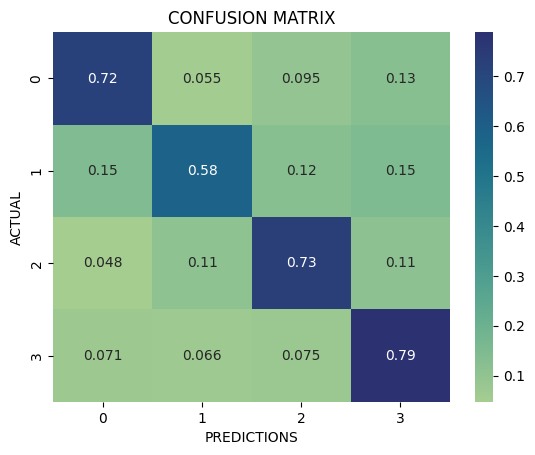

In [78]:
cf = confusion_matrix(y_test,pred, normalize = 'true')

sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('PREDICTIONS')
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX')